## Required libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
from scipy.stats.distributions import chi2


## Importing the data and preprocessing

In [16]:
df = pd.read_csv('Index2018.csv')
data2 = df.copy #copying the dataframe
df.date = pd.to_datetime(df.date, dayfirst = True) #parsing dates
df.set_index('date', inplace = True) #setting date column as index
df.asfreq('b') #setting a constant frequency as business days
df.fillna('ffill') #filling missing or nan values

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


In [17]:
# keeping only ftse column and removing rest 
df['market_value'] = df.ftse
del df['spx']
del df['dax']
del df['ftse']
del df['nikkei']
df.head()

,market_value
date,
1994-01-07,3445.98
1994-01-10,3440.58
1994-01-11,3413.77
1994-01-12,3372.02
1994-01-13,3360.01


In [18]:
#splitting the data into training and testing data
size = int(len(df)*0.8)
df_train = df[:size]
df_test = df[size:]

In [19]:
print(df_train.tail())
print(df_test.head())

            market_value
date                    
2013-03-28       6411.74
2013-03-29       6411.74
2013-04-01       6411.74
2013-04-02       6490.66
2013-04-03       6420.28
            market_value
date                    
2013-04-04       6344.11
2013-04-05       6249.77
2013-04-08       6276.94
2013-04-09       6313.20
2013-04-10       6387.37


## ACF

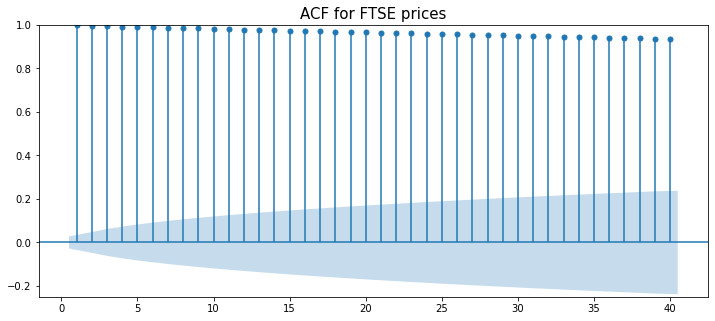

In [20]:
plt.rcParams['figure.figsize'] = (12,5)
sgt.plot_acf(df_train.market_value, lags = 40, zero = False)
plt.title('ACF for FTSE prices', size = 15)
plt.ylim(-.25,1)
plt.show()

## PACF

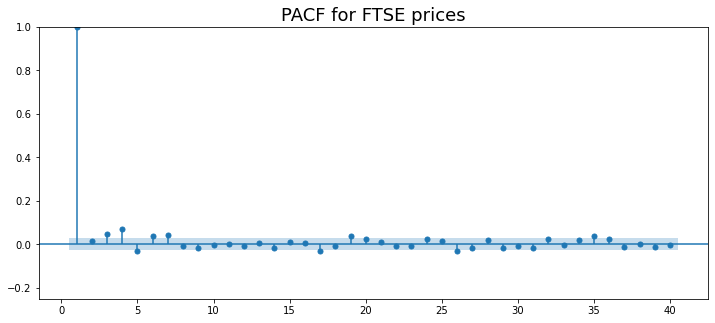

In [21]:
sgt.plot_pacf(df_train.market_value, zero = False, lags = 40, method = 'ols')
plt.title("PACF for FTSE prices", size = 18)
plt.ylim(-.25,1)
plt.show()

## AR(1) model

In [26]:
from statsmodels.tsa.arima.model import ARIMA

In [29]:
model_ar = ARIMA(df_train.market_value, order = (1,0,0))
model_ar.fit().summary()

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5015
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -27590.598
Date:                Wed, 25 Jan 2023   AIC                          55187.195
Time:                        23:54:01   BIC                          55206.756
Sample:                             0   HQIC                         55194.050
                               - 5015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5088.7896    432.857     11.756      0.000    4240.405    5937.174
ar.L1          0.9985      0.001   1143.852      0.000       0.997       1.000
sigma2      3512.7793     40.910     85.866      0.000    3432.598    3592.961
===================================================================================
Ljung-Box (L1) (Q):                   1.60   Jarque-Bera (JB):              3313.28
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Higher lag AR models

In [30]:
warnings.filterwarnings('ignore')
model_ar_2 = ARIMA(df_train.market_value, order = (2,0,0))
model_ar_2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5015
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -27589.897
Date:                Wed, 25 Jan 2023   AIC                          55187.794
Time:                        23:55:08   BIC                          55213.875
Sample:                             0   HQIC                         55196.933
                               - 5015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5088.7919    377.102     13.494      0.000    4349.686    5827.898
ar.L1          0.9806      0.010     99.782      0.000       0.961       1.000
ar.L2          0.0176      0.010      1.799      0.072      -0.002       0.037
sigma2      3511.4915     41.072     85.496      0.000    3430.992    3591.991
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3282.67
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
model_ar_3 = ARIMA(df_train.market_value, order = (3,0,0))
model_ar_3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5015
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -27583.870
Date:                Wed, 25 Jan 2023   AIC                          55177.740
Time:                        23:55:46   BIC                          55210.341
Sample:                             0   HQIC                         55189.164
                               - 5015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5088.7919    388.026     13.115      0.000    4328.275    5849.309
ar.L1          0.9798      0.010     98.991      0.000       0.960       0.999
ar.L2         -0.0306      0.013     -2.290      0.022      -0.057      -0.004
ar.L3          0.0491      0.009      5.401      0.000       0.031       0.067
sigma2      3503.5624     41.053     85.342      0.000    3423.100    3584.025
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              3287.49
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
model_ar_4 = ARIMA(df_train.market_value, order = (4,0,0))
model_ar_4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5015
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -27571.058
Date:                Wed, 25 Jan 2023   AIC                          55154.116
Time:                        23:56:02   BIC                          55193.237
Sample:                             0   HQIC                         55167.825
                               - 5015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5088.7919    401.681     12.669      0.000    4301.512    5876.072
ar.L1          0.9763      0.010     97.721      0.000       0.957       0.996
ar.L2         -0.0284      0.013     -2.106      0.035      -0.055      -0.002
ar.L3         -0.0210      0.013     -1.671      0.095      -0.046       0.004
ar.L4          0.0715      0.009      7.889      0.000       0.054       0.089
sigma2      3485.9546     41.961     83.076      0.000    3403.712    3568.197
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3047.12
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## LLR Test

In [33]:
def LLR_test(model_1, model_2, DF = 1):
    L1 = model_1.fit().llf
    L2 = model_2.fit().llf
    LR = 2*(L2-L1)
    p = chi2.sf(LR, DF).round(3)
    return p

In [34]:
model_ar_4 = ARIMA(df_train.market_value, order = (4,0,0))
print(model_ar_4.fit().summary())
print('LLR test p-value: ' + str(LLR_test(model_ar_3, model_ar_4)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5015
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -27571.058
Date:                Wed, 25 Jan 2023   AIC                          55154.116
Time:                        23:56:25   BIC                          55193.237
Sample:                             0   HQIC                         55167.825
                               - 5015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5088.7919    401.681     12.669      0.000    4301.512    5876.072
ar.L1          0.9763      0.010     97.721      0.000       0.957       0.996
ar.L2         -0.0284      0.013     -2.106      0.0

In [29]:
model_ar_4 = ARMA(data_train.market_value, order = (4,0))
print(model_ar_4.fit().summary())
print('LLR test p-value: ' + str(LLR_test(model_ar_3, model_ar_4)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5015
Model:                     ARMA(4, 0)   Log Likelihood              -27570.945
Method:                       css-mle   S.D. of innovations             59.037
Date:                Tue, 15 Nov 2022   AIC                          55153.890
Time:                        18:48:22   BIC                          55193.011
Sample:                             0   HQIC                         55167.599
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5059.7753    571.580      8.852      0.000    3939.498    6180.052
ar.L1.market_value     0.9766      0.014     69.435      0.000       0.949       1.004
ar.L2.market_value  

In [35]:
model_ar_5 = ARIMA(df_train.market_value, order = (5,0,0))
print(model_ar_5.fit().summary())
print('LLR test p-value: ' + str(LLR_test(model_ar_4, model_ar_5)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5015
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -27568.951
Date:                Wed, 25 Jan 2023   AIC                          55151.903
Time:                        23:56:58   BIC                          55197.544
Sample:                             0   HQIC                         55167.897
                               - 5015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5088.7919    395.706     12.860      0.000    4313.221    5864.362
ar.L1          0.9784      0.010     97.790      0.000       0.959       0.998
ar.L2         -0.0290      0.013     -2.149      0.0

In [36]:
model_ar_6 = ARIMA(df_train.market_value, order = (6,0,0))
print(model_ar_6.fit().summary())
print('LLR test p-value: ' + str(LLR_test(model_ar_5, model_ar_6)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5015
Model:                 ARIMA(6, 0, 0)   Log Likelihood              -27565.004
Date:                Wed, 25 Jan 2023   AIC                          55146.007
Time:                        23:57:12   BIC                          55198.169
Sample:                             0   HQIC                         55164.286
                               - 5015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5088.7919    407.045     12.502      0.000    4290.999    5886.585
ar.L1          0.9795      0.010     96.782      0.000       0.960       0.999
ar.L2         -0.0329      0.014     -2.410      0.0

In [37]:
model_ar_7 = ARIMA(df_train.market_value, order = (7,0,0))
print(model_ar_7.fit().summary())
print('LLR test p-value: ' + str(LLR_test(model_ar_6, model_ar_7)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5015
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -27560.294
Date:                Wed, 25 Jan 2023   AIC                          55138.587
Time:                        23:57:48   BIC                          55197.269
Sample:                             0   HQIC                         55159.151
                               - 5015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5088.7919    416.186     12.227      0.000    4273.083    5904.501
ar.L1          0.9778      0.010     95.650      0.000       0.958       0.998
ar.L2         -0.0300      0.014     -2.153      0.0

In [38]:
model_ar_8 = ARIMA(df_train.market_value, order = (8,0,0))
print(model_ar_8.fit().summary())
print('LLR test p-value: ' + str(LLR_test(model_ar_7, model_ar_8)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5015
Model:                 ARIMA(8, 0, 0)   Log Likelihood              -27560.098
Date:                Wed, 25 Jan 2023   AIC                          55140.195
Time:                        23:58:07   BIC                          55205.397
Sample:                             0   HQIC                         55163.044
                               - 5015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5088.7919    417.984     12.175      0.000    4269.558    5908.026
ar.L1          0.9782      0.010     95.628      0.000       0.958       0.998
ar.L2         -0.0301      0.014     -2.153      0.0

---

AR(7) model is the best AR model for this data

### analysing residuals

In [57]:
df_train['residuals'] = model_ar_7.fit().resid
df_train.head()

,market_value,residuals
date,,
1994-01-07,3445.98,-1642.811850
1994-01-10,3440.58,-8.448640
1994-01-11,3413.77,-29.909670
1994-01-12,3372.02,-45.413970
1994-01-13,3360.01,-17.435176


In [50]:
df_train.residuals.describe()

count    5015.000000
mean        0.386322
std        63.305884
min     -1642.811850
25%       -26.869569
50%         2.227498
75%        29.705323
max       418.437948
Name: residuals, dtype: float64

In [51]:
#dickey fuller test on residuals
import statsmodels.tsa.stattools as sts
sts.adfuller(df_train.residuals)

(-76.01235973798182,
 0.0,
 0,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54778.67671793427)

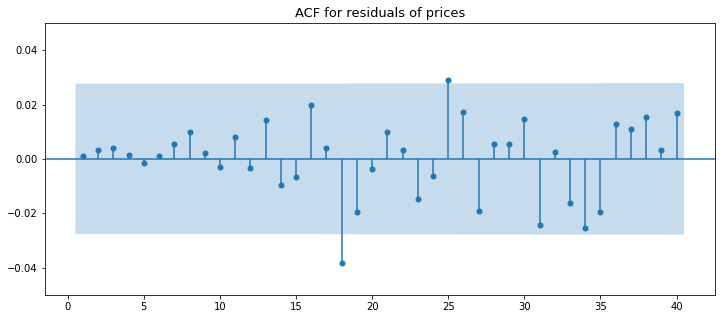

In [54]:
#plotting acf
sgt.plot_acf(df_train.residuals, lags = 40, zero = False)
plt.title('ACF for residuals of prices', size = 13)
plt.ylim(-.05,.05)
plt.show()

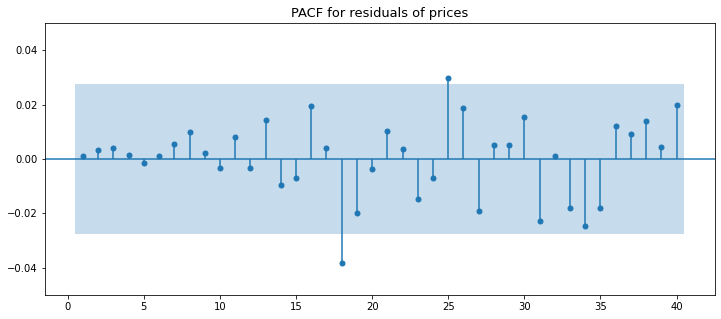

In [55]:
#plotting pacf
sgt.plot_pacf(df_train.residuals, lags = 40, zero = False)
plt.title('PACF for residuals of prices', size = 13)
plt.ylim(-.05,.05)
plt.show()

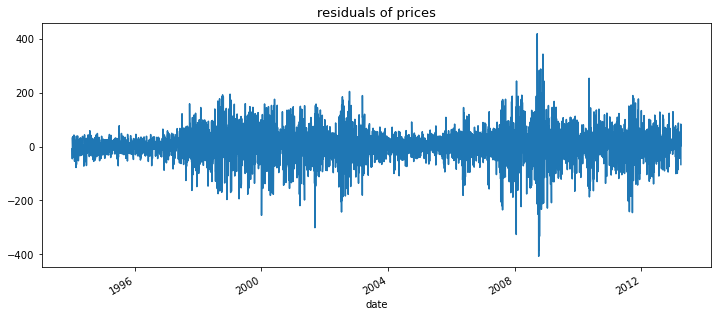

In [58]:
#plotting the residuals
df_train.residuals[1:].plot(figsize = (12,5))
plt.title('residuals of prices',size = 13)
plt.show()

### finding returns


In [11]:
df_train['returns'] = (df_train.market_value.pct_change(1)*100)
df_train = df_train[1:]
df_train.head()

<ipython-input-11-255cede83684>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['returns'] = (df_train.market_value.pct_change(1)*100)


,market_value,returns
date,,
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166
1994-01-14,3400.56,1.206842


In [13]:
sts.adfuller(df_train.returns)

(-12.784216449537105,
 7.305352237049088e-24,
 32,
 4981,
 {'1%': -3.4316635260404795,
  '5%': -2.8621204359855366,
  '10%': -2.567078966862675},
 15687.226611354214)

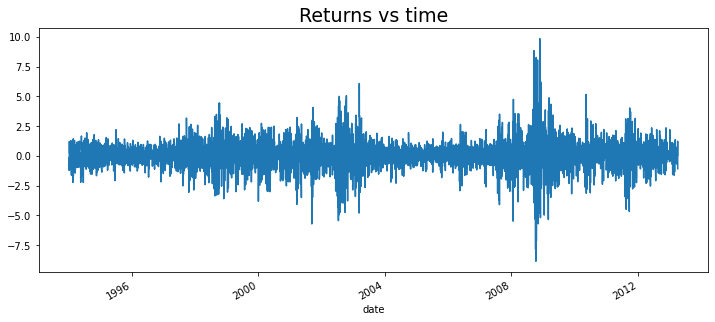

In [26]:
plt.rcParams['figure.figsize'] = (12,5)
df_train.returns.plot()
plt.title('Returns vs time', size = 19)
plt.show()

### acf and pacf for returns

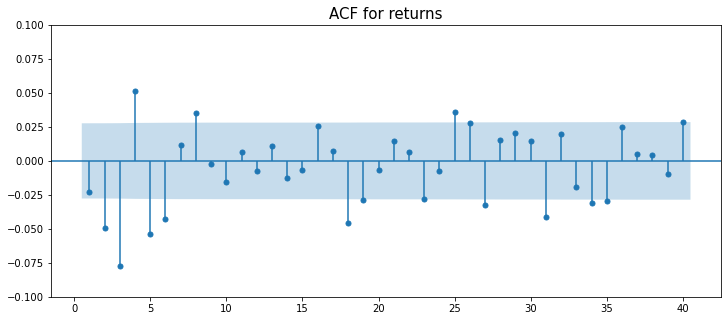

In [19]:
plt.rcParams['figure.figsize'] = (12,5)
sgt.plot_acf(df_train.returns, lags = 40, zero = False)
plt.title('ACF for returns', size = 15)
plt.ylim(-.1,.1)
plt.show()

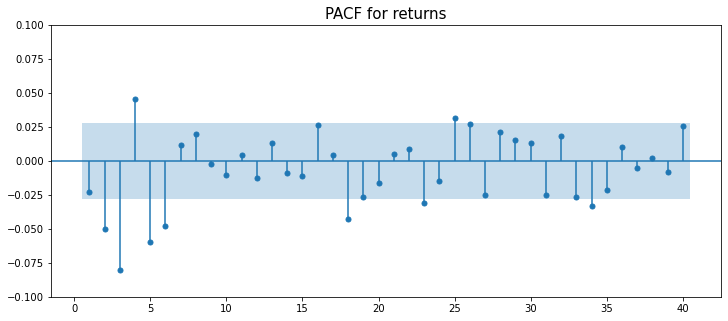

In [21]:
sgt.plot_pacf(df_train.returns, lags = 40, zero = False, method = 'ywm')
plt.title('PACF for returns', size = 15)
plt.ylim(-.1,.1)
plt.show()

### AR(1) model on returns

In [23]:
model_ar = ARIMA(df_train.returns, order = (1,0,0))
results_ar = model_ar.fit()
results_ar.summary()

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5014
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -7921.907
Date:                Thu, 26 Jan 2023   AIC                          15849.813
Time:                        00:25:20   BIC                          15869.373
Sample:                             0   HQIC                         15856.668
                               - 5014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0193      0.016      1.176      0.240      -0.013       0.052
ar.L1         -0.0231      0.009     -2.711      0.007      -0.040      -0.006
sigma2         1.3799      0.014    100.027      0.000       1.353       1.407
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7858.50
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### higher lag models

In [27]:
model_ar_2 = ARIMA(df_train.returns, order = (2,0,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5014
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -7915.628
Date:                Thu, 26 Jan 2023   AIC                          15839.256
Time:                        00:31:40   BIC                          15865.336
Sample:                             0   HQIC                         15848.396
                               - 5014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0193      0.016      1.226      0.220      -0.012       0.050
ar.L1         -0.0243      0.009     -2.811      0.005      -0.041      -0.007
ar.L2         -0.0500      0.008     -6.365      0.000      -0.065      -0.035
sigma2         1.3765      0.014     99.534      0.000       1.349       1.404
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              7717.27
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
LLR_test(model_ar, model_ar_2)

0.0

In [30]:
model_ar_3 = ARIMA(df_train.returns, order = (3,0,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5014
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -7899.421
Date:                Thu, 26 Jan 2023   AIC                          15808.842
Time:                        00:34:31   BIC                          15841.441
Sample:                             0   HQIC                         15820.266
                               - 5014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0194      0.015      1.302      0.193      -0.010       0.048
ar.L1         -0.0283      0.009     -3.202      0.001      -0.046      -0.011
ar.L2         -0.0520      0.008     -6.667      0.000      -0.067      -0.037
ar.L3         -0.0803      0.008    -10.037      0.000      -0.096      -0.065
sigma2         1.3676      0.014     94.479      0.000       1.339       1.396
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              6855.84
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               2.02   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
LLR_test(model_ar, model_ar_3, DF = 2)

0.0

In [33]:
model_ar_4 = ARIMA(df_train.returns, order = (4,0,0))
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5014
Model:                 ARIMA(4, 0, 0)   Log Likelihood               -7894.264
Date:                Thu, 26 Jan 2023   AIC                          15800.528
Time:                        00:38:45   BIC                          15839.648
Sample:                             0   HQIC                         15814.237
                               - 5014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0193      0.016      1.239      0.215      -0.011       0.050
ar.L1         -0.0247      0.009     -2.787      0.005      -0.042      -0.007
ar.L2         -0.0496      0.008     -6.320      0.000      -0.065      -0.034
ar.L3         -0.0790      0.008     -9.848      0.000      -0.095      -0.063
ar.L4          0.0453      0.008      5.512      0.000       0.029       0.061
sigma2         1.3648      0.015     92.756      0.000       1.336       1.394
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              6583.23
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
LLR_test(model_ar_3,model_ar_4)

0.001

In [35]:
model_ar_5 = ARIMA(df_train.returns, order = (5,0,0))
results_ar_5 = model_ar_5.fit()
results_ar_5.summary()

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5014
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -7885.221
Date:                Thu, 26 Jan 2023   AIC                          15784.442
Time:                        00:39:36   BIC                          15830.082
Sample:                             0   HQIC                         15800.436
                               - 5014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0193      0.015      1.304      0.192      -0.010       0.048
ar.L1         -0.0220      0.009     -2.418      0.016      -0.040      -0.004
ar.L2         -0.0543      0.008     -6.814      0.000      -0.070      -0.039
ar.L3         -0.0820      0.008    -10.261      0.000      -0.098      -0.066
ar.L4          0.0439      0.008      5.297      0.000       0.028       0.060
ar.L5         -0.0600      0.008     -7.510      0.000      -0.076      -0.044
sigma2         1.3599      0.015     92.515      0.000       1.331       1.389
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              6400.33
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
LLR_test(model_ar_4,model_ar_5)

0.0

In [39]:
model_ar_6 = ARIMA(df_train.returns, order = (6,0,0))
results_ar_6 = model_ar_6.fit()
print(results_ar_6.summary())
LLR_test(model_ar_5,model_ar_6)

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5014
Model:                 ARIMA(6, 0, 0)   Log Likelihood               -7879.519
Date:                Thu, 26 Jan 2023   AIC                          15775.039
Time:                        00:42:06   BIC                          15827.198
Sample:                             0   HQIC                         15793.317
                               - 5014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0194      0.014      1.355      0.175      -0.009       0.047
ar.L1         -0.0248      0.009     -2.671      0.008      -0.043      -0.007
ar.L2         -0.0522      0.008     -6.493      0.0

0.001

In [40]:
model_ar_7 = ARIMA(df_train.returns, order = (7,0,0))
results_ar_7 = model_ar_7.fit()
print(results_ar_7.summary())
LLR_test(model_ar_6,model_ar_7)

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5014
Model:                 ARIMA(7, 0, 0)   Log Likelihood               -7879.173
Date:                Thu, 26 Jan 2023   AIC                          15776.346
Time:                        00:42:38   BIC                          15835.026
Sample:                             0   HQIC                         15796.909
                               - 5014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0194      0.015      1.334      0.182      -0.009       0.048
ar.L1         -0.0242      0.009     -2.603      0.009      -0.043      -0.006
ar.L2         -0.0515      0.008     -6.357      0.0

0.405

From above results we can say that AR(6) is better than AR(7) and higher lags models

### normalizing prices and performing dickey fuller test

In [42]:
benchmark = df_train.market_value.iloc[0]
df_train['norm_prices'] = (df_train.market_value/benchmark)*100


In [44]:
sts.adfuller(df_train.norm_prices) #results show non-stationarity

(-1.8406676829625512,
 0.3604662927099037,
 6,
 5007,
 {'1%': -3.431656701752533,
  '5%': -2.862117421053178,
  '10%': -2.5670773618962612},
 19532.876769094495)

### normalizing returns and performing dickey fuller test

In [45]:
ret = df_train.returns.iloc[0]
df_train['norm_returns'] = (df_train.returns/ret)*100

In [46]:
sts.adfuller(df_train.norm_returns) #stationary series

(-12.78421644953709,
 7.305352237049716e-24,
 32,
 4981,
 {'1%': -3.4316635260404795,
  '5%': -2.8621204359855366,
  '10%': -2.567078966862675},
 80027.44775098964)

### fitting AR models to normalised returns

In [47]:
model_norm = ARIMA(df_train.norm_returns, order = (1,0,0))
results_norm = model_norm.fit()
print(results_norm.summary())

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           norm_returns   No. Observations:                 5014
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -40305.150
Date:                Thu, 26 Jan 2023   AIC                          80616.300
Time:                        00:59:22   BIC                          80635.860
Sample:                             0   HQIC                         80623.154
                               - 5014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.3276     10.484     -1.176      0.240     -32.876       8.220
ar.L1         -0.0232      0.009     -2.711      0.007      -0.040      -0.006
sigma2      5.621e+05   5620.223    100.007      0.0

In [48]:
model_norm_2 = ARIMA(df_train.norm_returns, order = (2,0,0))
results_norm_2 = model_norm_2.fit()
print(results_norm_2.summary())
LLR_test(model_norm, model_norm_2)

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           norm_returns   No. Observations:                 5014
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -40298.872
Date:                Thu, 26 Jan 2023   AIC                          80605.743
Time:                        01:00:09   BIC                          80631.823
Sample:                             0   HQIC                         80614.882
                               - 5014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.3276     10.058     -1.226      0.220     -32.040       7.385
ar.L1         -0.0243      0.009     -2.808      0.005      -0.041      -0.007
ar.L2         -0.0500      0.008     -6.361      0.0

0.0

In [49]:
model_norm_3 = ARIMA(df_train.norm_returns, order = (3,0,0))
results_norm_3 = model_norm_3.fit()
print(results_norm_3.summary())
LLR_test(model_norm_2, model_norm_3)

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           norm_returns   No. Observations:                 5014
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -40282.664
Date:                Thu, 26 Jan 2023   AIC                          80575.328
Time:                        01:00:51   BIC                          80607.928
Sample:                             0   HQIC                         80586.752
                               - 5014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.3276      9.491     -1.299      0.194     -30.930       6.275
ar.L1         -0.0283      0.009     -3.195      0.001      -0.046      -0.011
ar.L2         -0.0519      0.008     -6.661      0.0

0.0

In [50]:
model_norm_4 = ARIMA(df_train.norm_returns, order = (4,0,0))
results_norm_4 = model_norm_4.fit()
print(results_norm_4.summary())
LLR_test(model_norm_3, model_norm_4)

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           norm_returns   No. Observations:                 5014
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -40277.507
Date:                Thu, 26 Jan 2023   AIC                          80567.015
Time:                        01:01:34   BIC                          80606.135
Sample:                             0   HQIC                         80580.724
                               - 5014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.3276      9.965     -1.237      0.216     -31.859       7.203
ar.L1         -0.0247      0.009     -2.786      0.005      -0.042      -0.007
ar.L2         -0.0496      0.008     -6.317      0.0

0.001

In [51]:
model_norm_5 = ARIMA(df_train.norm_returns, order = (5,0,0))
results_norm_5 = model_norm_5.fit()
print(results_norm_5.summary())
LLR_test(model_norm_4, model_norm_5)

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           norm_returns   No. Observations:                 5014
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -40268.465
Date:                Thu, 26 Jan 2023   AIC                          80550.929
Time:                        01:02:14   BIC                          80596.569
Sample:                             0   HQIC                         80566.923
                               - 5014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.3276      9.472     -1.301      0.193     -30.893       6.237
ar.L1         -0.0219      0.009     -2.416      0.016      -0.040      -0.004
ar.L2         -0.0543      0.008     -6.813      0.0

0.0

In [52]:
model_norm_6 = ARIMA(df_train.norm_returns, order = (6,0,0))
results_norm_6 = model_norm_6.fit()
print(results_norm_6.summary())
LLR_test(model_norm_5, model_norm_6)

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           norm_returns   No. Observations:                 5014
Model:                 ARIMA(6, 0, 0)   Log Likelihood              -40262.763
Date:                Thu, 26 Jan 2023   AIC                          80541.526
Time:                        01:02:48   BIC                          80593.686
Sample:                             0   HQIC                         80559.805
                               - 5014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.3276      9.119     -1.352      0.176     -30.201       5.545
ar.L1         -0.0248      0.009     -2.668      0.008      -0.043      -0.007
ar.L2         -0.0522      0.008     -6.490      0.0

0.001

In [53]:
model_norm_7 = ARIMA(df_train.norm_returns, order = (7,0,0))
results_norm_7 = model_norm_7.fit()
print(results_norm_7.summary())
LLR_test(model_norm_6, model_norm_7)

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           norm_returns   No. Observations:                 5014
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -40262.417
Date:                Thu, 26 Jan 2023   AIC                          80542.834
Time:                        01:03:15   BIC                          80601.514
Sample:                             0   HQIC                         80563.397
                               - 5014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.3276      9.266     -1.330      0.183     -30.490       5.834
ar.L1         -0.0242      0.009     -2.601      0.009      -0.043      -0.006
ar.L2         -0.0515      0.008     -6.353      0.0

0.405

We can see that normalising did not have any impact on model selection. For each model, the coefficients are same as that for non-normalised values.

### analysing residuals

In [57]:
df_train['residuals_returns'] = results_ar_6.resid
del df_train['residuals']
df_train.head()


,market_value,returns,norm_prices,norm_returns,residuals_returns
date,,,,,
1994-01-10,3440.58,-0.156704,100.000000,100.000000,-0.176059
1994-01-11,3413.77,-0.779229,99.220771,497.260711,-0.802660
1994-01-12,3372.02,-1.222988,98.007313,780.443046,-1.270555
1994-01-13,3360.01,-0.356166,97.658244,227.285567,-0.466308
1994-01-14,3400.56,1.206842,98.836824,-770.139292,1.061535


In [58]:
#dickey fuller test on residuals
import statsmodels.tsa.stattools as sts
sts.adfuller(df_train.residuals_returns)

(-70.74201821141006,
 0.0,
 0,
 5013,
 {'1%': -3.431655136974821,
  '5%': -2.8621167297421373,
  '10%': -2.567076993884522},
 15677.703848693902)

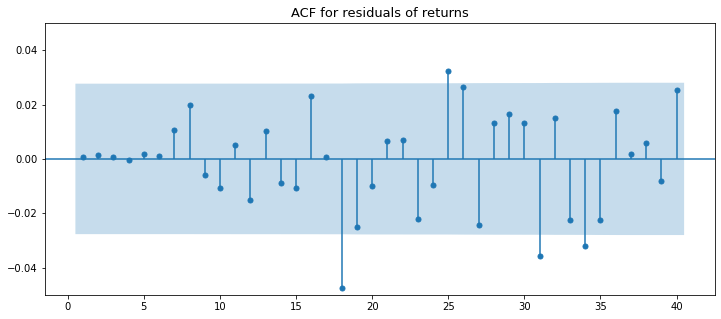

In [59]:
#plotting acf
sgt.plot_acf(df_train.residuals_returns, lags = 40, zero = False)
plt.title('ACF for residuals of returns', size = 13)
plt.ylim(-.05,.05)
plt.show()

D:\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


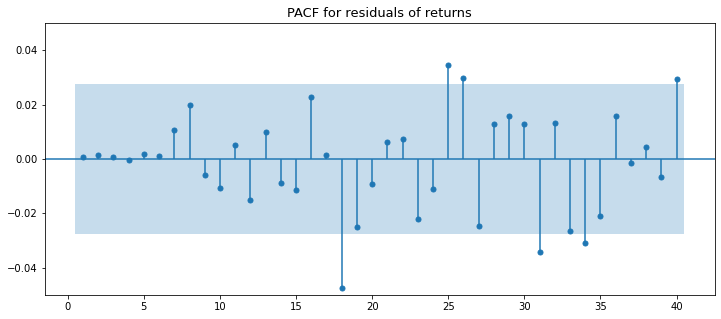

In [60]:
#plotting pacf
sgt.plot_pacf(df_train.residuals_returns, lags = 40, zero = False)
plt.title('PACF for residuals of returns', size = 13)
plt.ylim(-.05,.05)
plt.show()

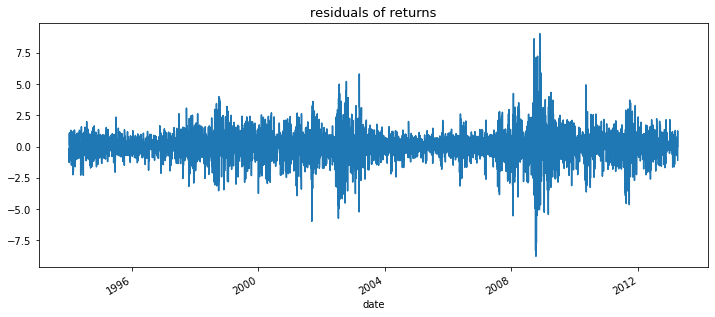

In [62]:
#plotting the residuals
df_train.residuals_returns.plot(figsize = (12,5))
plt.title('residuals of returns',size = 13)
plt.show()